## Import packages

In [1]:
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from CFModel import CFModel

Using Theano backend.
Using gpu device 0: GRID K520 (CNMeM is disabled, cuDNN 5006)


## Define constants


In [2]:
RATINGS_CSV_FILE = 'ml1m_ratings.csv'
MODEL_WEIGHTS_FILE = 'ml1m_weights.h5'
K_FACTORS = 120
RNG_SEED = 1446557

## Load MovieLens 1M data

In [3]:
ratings = pd.read_csv(RATINGS_CSV_FILE, 
                      sep='\t', 
                      encoding='latin-1', 
                      usecols=['userid', 'movieid', 'user_emb_id', 'movie_emb_id', 'rating'])
max_userid = ratings['userid'].drop_duplicates().max()
max_movieid = ratings['movieid'].drop_duplicates().max()
print len(ratings), 'ratings loaded.'

1000209 ratings loaded.


## Create training set

In [4]:
shuffled_ratings = ratings.sample(frac=1., random_state=RNG_SEED)
Users = shuffled_ratings['user_emb_id'].values
print 'Users:', Users, ', shape =', Users.shape
Movies = shuffled_ratings['movie_emb_id'].values
print 'Movies:', Movies, ', shape =', Movies.shape
Ratings = shuffled_ratings['rating'].values
print 'Ratings:', Ratings, ', shape =', Ratings.shape

Users: [4403 1819 2571 ...,  354 3510  831] , shape = (1000209,)
Movies: [2717 3692  149 ..., 2700 2920 3711] , shape = (1000209,)
Ratings: [5 4 4 ..., 2 4 4] , shape = (1000209,)


## Define model

In [5]:
model = CFModel(max_userid, max_movieid, K_FACTORS)
model.compile(loss='mse', optimizer='adamax')

## Train model

In [6]:
callbacks = [EarlyStopping('val_loss', patience=2), 
             ModelCheckpoint(MODEL_WEIGHTS_FILE, save_best_only=True)]
history = model.fit([Users, Movies], Ratings, nb_epoch=30, validation_split=.1, verbose=2, callbacks=callbacks)

Train on 900188 samples, validate on 100021 samples
Epoch 1/30
68s - loss: 7.9214 - val_loss: 2.0847
Epoch 2/30
68s - loss: 1.3914 - val_loss: 1.0758
Epoch 3/30
68s - loss: 0.9606 - val_loss: 0.9078
Epoch 4/30
68s - loss: 0.8582 - val_loss: 0.8514
Epoch 5/30
68s - loss: 0.8129 - val_loss: 0.8213
Epoch 6/30
68s - loss: 0.7831 - val_loss: 0.8033
Epoch 7/30
68s - loss: 0.7597 - val_loss: 0.7889
Epoch 8/30
68s - loss: 0.7379 - val_loss: 0.7772
Epoch 9/30
68s - loss: 0.7162 - val_loss: 0.7680
Epoch 10/30
68s - loss: 0.6948 - val_loss: 0.7601
Epoch 11/30
68s - loss: 0.6721 - val_loss: 0.7529
Epoch 12/30
68s - loss: 0.6490 - val_loss: 0.7477
Epoch 13/30
68s - loss: 0.6254 - val_loss: 0.7451
Epoch 14/30
68s - loss: 0.6019 - val_loss: 0.7436
Epoch 15/30
68s - loss: 0.5778 - val_loss: 0.7435
Epoch 16/30
68s - loss: 0.5537 - val_loss: 0.7459
Epoch 17/30
68s - loss: 0.5302 - val_loss: 0.7488
Epoch 18/30
68s - loss: 0.5070 - val_loss: 0.7543


## Plot training and validation RMSE

(0.0, 3.0)

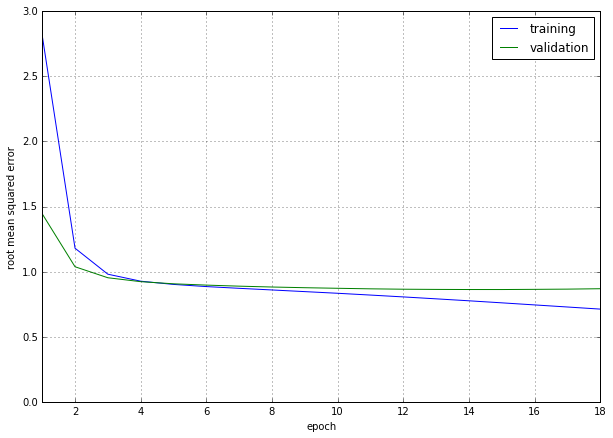

In [7]:
loss = pd.DataFrame({'epoch': [ i + 1 for i in history.epoch ],
                     'training': [ math.sqrt(loss) for loss in history.history['loss'] ],
                     'validation': [ math.sqrt(loss) for loss in history.history['val_loss'] ]})
ax = loss.ix[:,:].plot(x='epoch', figsize={7,10}, grid=True)
ax.set_ylabel("root mean squared error")
ax.set_ylim([0.0,3.0]);

## Print best validation RMSE

In [8]:
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
print 'Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss))

Minimum RMSE at epoch 15 = 0.8623
